c:\Users\User\M1ES\High_Dim_ML\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


--- 1. Chargement du dataset Forest Cover Type ---
Taille totale brute : (581012, 55) (C'est énorme !)
Taille de l'échantillon utilisé : (5000, 55)
Nombre de classes d'arbres : 7

--- 2. Calcul des Scores (Accuracy) ---
LDA (Linéaire)      : 65.40%
Random Forest       : 76.50%
Calcul du Boosting en cours...
Gradient Boosting   : 72.50%

--- 3. Visualisation UMAP (La structure parfaite) ---


c:\Users\User\M1ES\High_Dim_ML\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


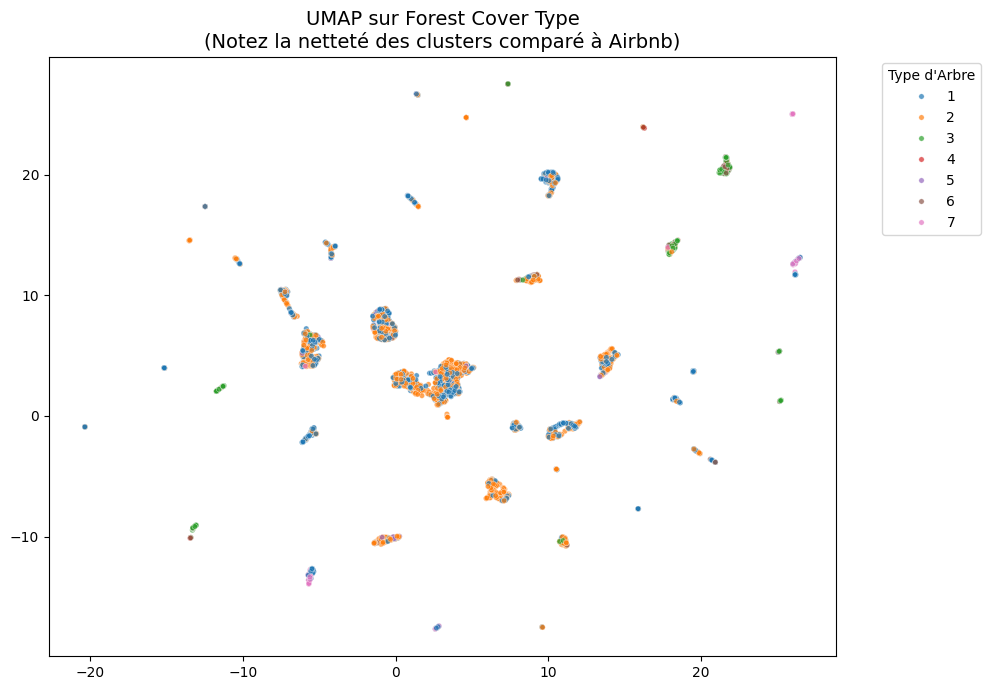

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import umap

print("--- 1. Chargement du dataset Forest Cover Type ---")
forest = fetch_covtype(as_frame=True)
df_full = forest.frame

print(f"Taille totale brute : {df_full.shape} (C'est énorme !)")

df = df_full.sample(n=5000, random_state=42).copy()

# X et y
X = df.drop(columns='Cover_Type')
y = df['Cover_Type']

print(f"Taille de l'échantillon utilisé : {df.shape}")
print(f"Nombre de classes d'arbres : {y.nunique()}")

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
acc_rf = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest       : {acc_rf:.2%}")



# UMAP
print("\n--- 3. Visualisation UMAP (La structure parfaite) ---")
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_umap[:, 0], 
    y=X_umap[:, 1], 
    hue=y, 
    palette='tab10', # Palette distincte pour 7 classes
    alpha=0.7, 
    s=15
)
plt.title(f'UMAP sur Forest Cover Type\n(Notez la netteté des clusters comparé à Airbnb)', fontsize=14)
plt.legend(title='Type d\'Arbre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()